In [1]:
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()

In [2]:
#Prajakta Pandit
#Assignment 1: Read in a text file in which each line describes a world city, store the information about each city in its own 
#object within a list, sort the list using quicksort, write the results out to a file, and display 
#part of the output file in a visualization on a world map.


class City:
     def __init__(self, country, name, region, population, latitude, longitude):
         # initializing City parameters
         self.country = str(country)
         self.name = str(name)
         self.region = str(region)
         self.population = int(population)
         self.latitude = float(latitude)
         self.longitude = float(longitude)
  
     def get_population(self):                                                    #function to return population
         return int(self.population) 
  
     def get_latitude(self):                                                    #function to return latitude
         return float(self.latitude) 
  
     def get_name(self):                                                    #function to return name
         return str(self.name) 
  
     def __str__(self):                                                      #function to print city details
         newstring = str(self.name) +","+ str(self.population) +","+ str(self.latitude) +","+ str(self.longitude)
         return newstring


def write_to_file(filename):                  #function to write to file
    line_ct2 = 0
    out_file = open(filename, "w")
    for city in NewList:
        out_file.write(city.name + "," + str(city.population) + "," + str(city.latitude)+ "," + str(city.longitude)+"\n")
        line_ct2 = line_ct2 +1              
    print ("\n"+filename+ " line count:")    #displaying line count to test successful write
    print (line_ct2)
    out_file.close()

#opening file
in_file = open("world_cities.txt", "r")

#List for storing file content
NewList = []
line_ct = 0

#using split function to create a list of cities
for line in in_file:
    comp = line.strip().split(",")
    cities = City(comp[0], comp[1], comp[2], comp[3], comp[4], comp[5])
    NewList.append(cities)
    line_ct = line_ct + 1

#closing file
in_file.close()

print ("Original line count:")
print (line_ct)


sort(NewList, compare_name) #Sorted by name and written to file
write_to_file ("cities_alpha.txt")


sort(NewList, compare_population) #Sorted by population and written to file
write_to_file ("cities_population.txt")


sort(NewList, compare_latitude)  #Sorted by latitude and written to file
write_to_file ("cities_latitude.txt")

Original line count:
47913

cities_alpha.txt line count:
47913

cities_population.txt line count:
47913

cities_latitude.txt line count:
47913


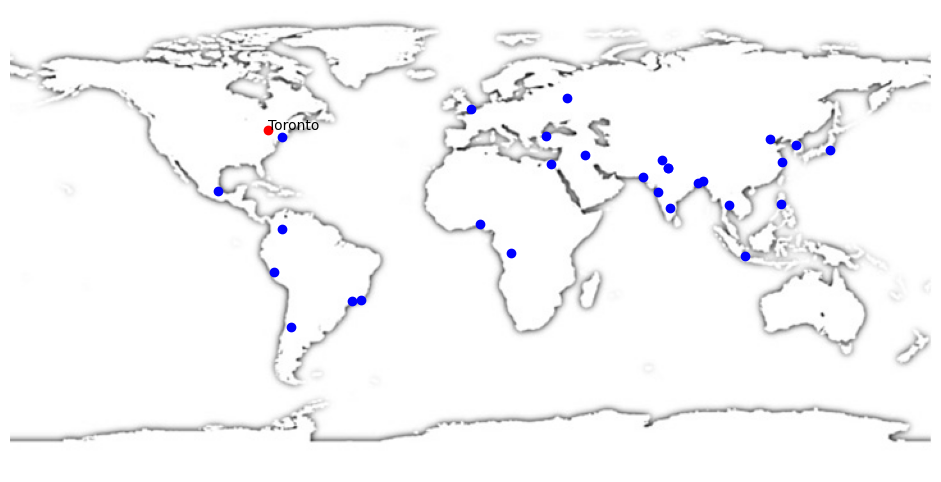

In [3]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

WIDTH = 720 # image (world.png) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution

# Convert a latitude and longitude to pixel locations.
# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)


#opening file
    
with open("cities_population.txt", "r") as in_file2:
    
    #List for storing file content
    NewList2 = []
    line_ct3 = 0

#looping through file to create a list of cities
    for line in in_file2:
        
        img = plt.imread("world.jpg")                   #displaying map
        plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
        plt.imshow(img)

        if line_ct3>0:                                  #drawing blue plots for past cities
            for comp in NewList2:
                x, y = longlat_to_pixel(float(comp[2]), float(comp[3]))
                plt.plot(x, y, 'bo') # plot one blue data point
                       
        comp = line.strip().split(",")
        name = str(comp[0])
        x, y = longlat_to_pixel(float(comp[2]), float(comp[3]))   #converting latitude and longitude
        NewList2.append(comp)
        
        plt.axis('off')
        plt.plot(x, y, 'ro') # plot one RED data point
        plt.text(x, y, name) #write name of city
        time.sleep(0.5)
       
        line_ct3 = line_ct3 + 1          #condition for top 30 cities
        if line_ct3 == 30:
            break

        plt.show()
        clear_output(wait=True)


#closing file
in_file2.close()


In [12]:
#Driver
lim = 10

print("Print object:")
for city in NewList:
    print (city)
    lim = lim - 1
    if lim == 0:
        break

print("\nPrint population:")
print (cities.get_population())
print("Print latitude:")
print (cities.get_latitude())
print("Print name:")
print (cities.get_name())

Print object:
Ushuaia,58045,-54.8,-68.3
Punta Arenas,117432,-53.15,-70.9166667
Rio Gallegos,93234,-51.6333333,-69.2166667
Port-Aux-Francais,45,-49.35,70.2166667
Bluff,1938,-46.6,168.333333
Owaka,395,-46.45,169.666667
Invercargill,47287,-46.4,168.35
Woodlands,285,-46.366667,168.55
Riverton,1651,-46.35,168.016667
Wallacetown,638,-46.333333,168.266667

Print population:
79876
Print latitude:
-20.3333333
Print name:
Zvishavane
